In [2]:
# Setup

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np


In [3]:
# Read county cancer data

cancer_stats_df = pd.read_csv('cancer_export_df.csv')

# Viz
cancer_stats_df.head()

,County,State,"Age-Adjusted Incidence Rate - cases per 100,000",Average Annual Count,Recent Trend
0,Los Angeles County,California,380.3,39939,falling
1,Cook County,Illinois,448.9,25748,falling
2,Maricopa County,Arizona,394.2,17933,falling
3,Harris County,Texas,395.1,15735,falling
4,San Diego County,California,417.7,14412,falling


In [14]:
# Create new df to combine state count totals

chart_df = cancer_stats_df[['State','Average Annual Count']]
state_groups_df = chart_df.groupby('State')


annual_count = state_groups_df["Average Annual Count"].sum()
annual_count_df = annual_count.to_frame()
annual_count_df = annual_count_df.reset_index(level = None, drop = False, inplace = False, col_level = 0, col_fill = '')
annual_count_df

,State,Average Annual Count
0,Alabama,26346
1,Alaska,2862
2,Arizona,31453
3,Arkansas,16903
4,California,168606
5,Colorado,23152
6,Connecticut,21014
7,Delaware,5831
8,Florida,126556
9,Georgia,50410


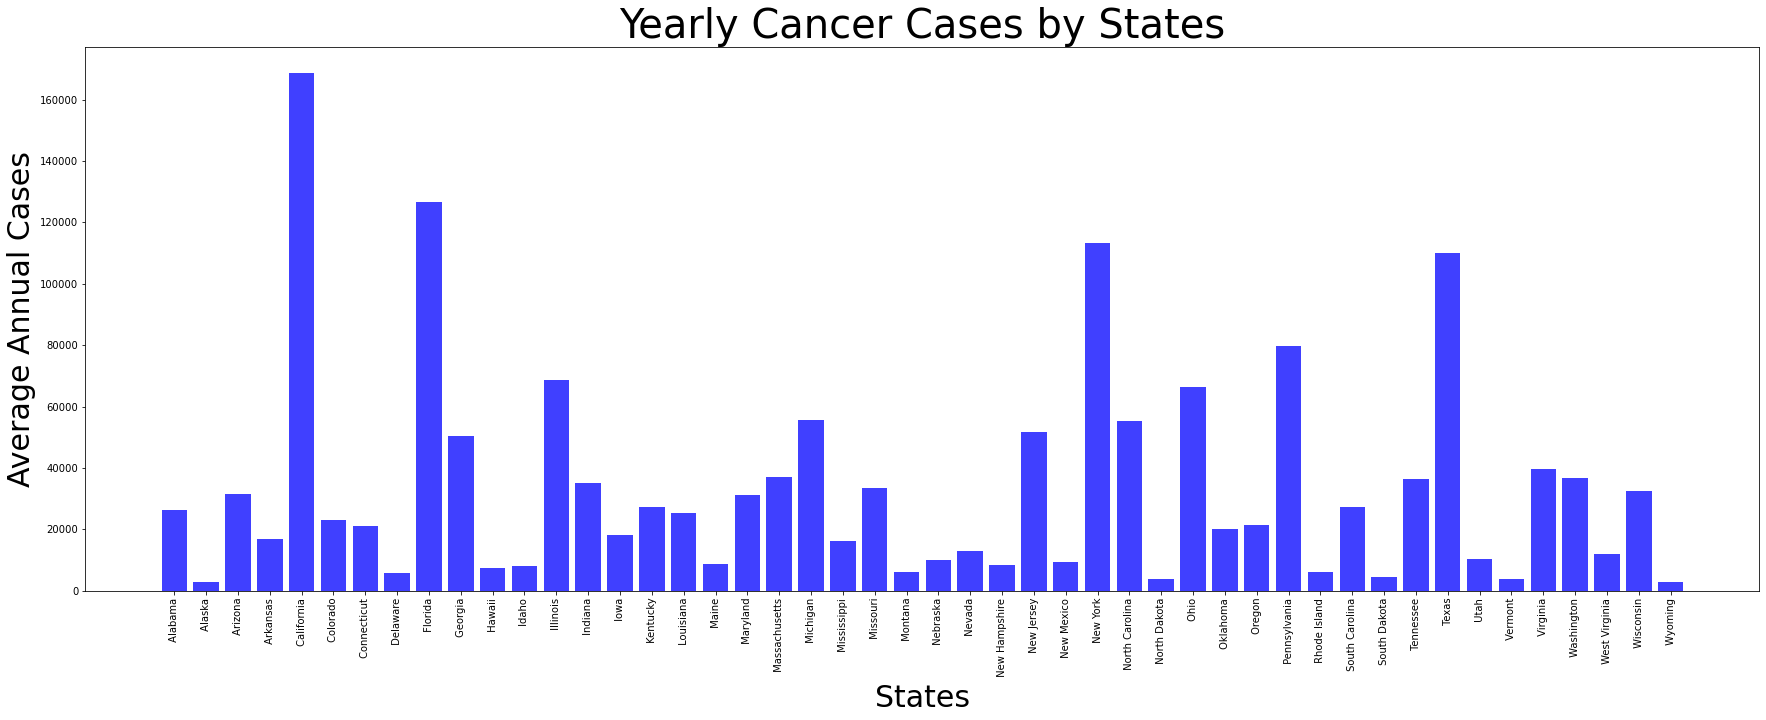

In [21]:
# Create Bar chart showing cancer rate by state

x_axis = np.arange(len(annual_count_df))
ticks = [value for value in x_axis]
# print (list(annual_count_df["State"]))


plt.figure(figsize = (30,10))
plt.bar(x_axis, annual_count_df["Average Annual Count"], color= 'b', alpha =0.75)
plt.xticks(ticks, list(annual_count_df["State"]),rotation = 90)
plt.xlabel("States", fontsize = 30)
plt.ylabel("Average Annual Cases", fontsize = 30)
plt.title("Yearly Cancer Cases by States", fontsize = 40)
plt.savefig("./CancerBarChart.png")
plt.show()

